<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:#7EC0EE;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Covid-19 data for Italy 🤒 </p>

<img src="https://media0.giphy.com/media/MCAFTO4btHOaiNRO1k/200.webp?cid=790b7611yriwbe5vspsallv6twjyu6kae74xm13jpe5y5l9u&ep=v1_gifs_search&rid=200.webp&ct=g" width="150%" height="100%">


<a id="dataoverview"></a>  
# <p style="padding:5px;background-color:#7EC0EE;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 15px;overflow:hidden;font-weight:500"> Import the Necessary Libraries 📚</p>

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

<a id="datareading"></a>  
# <p style="padding:5px;background-color:#7EC0EE;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 15px;overflow:hidden;font-weight:500"> Reading the data 📖</p>

In [135]:
data = pd.read_csv('/content/italy-covid-daywise.csv')
data.tail().style.background_gradient(cmap='Blues')

,date,new_cases,new_deaths,new_tests
243,2020-08-30,1444.000000,1.000000,53541.000000
244,2020-08-31,1365.000000,4.000000,42583.000000
245,2020-09-01,996.000000,6.000000,54395.000000
246,2020-09-02,975.000000,8.000000,nan
247,2020-09-03,1326.000000,6.000000,nan


In [136]:
#retrieve the number of rows and columns in the data frame
data.shape

(248, 4)

In [137]:
#view statistical information for numerical columns
data.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
new_cases,248.000000,1094.818548,1554.508002,-148.000000,123.000000,342.000000,1371.750000,6557.000000
new_deaths,248.000000,143.133065,227.105538,-31.000000,3.000000,17.000000,175.250000,971.000000
new_tests,135.000000,31699.674074,11622.209757,7841.000000,25259.000000,29545.000000,37711.000000,95273.000000


In [138]:
data.describe(include="object").T.style.background_gradient(cmap='Blues')

,count,unique,top,freq
date,248,248,2019-12-31,1


In [140]:
#view some basic information about the data frame like data types, and number of non-nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [141]:
data.dtypes

,0
date,object
new_cases,float64
new_deaths,float64
new_tests,float64


In [142]:
data.isna().sum()

,0
date,0
new_cases,0
new_deaths,0
new_tests,113


In [143]:
data.isna().sum()/data.shape[0]*100

,0
date,0.000000
new_cases,0.000000
new_deaths,0.000000
new_tests,45.564516


In [144]:
data.nunique()

,0
date,248
new_cases,188
new_deaths,129
new_tests,135


In [145]:
data.duplicated().sum()

0

In [146]:
data[(data.iloc[:, 1] == 0) & (data.iloc[:, 2] == 0)].style.background_gradient(cmap='Blues')

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.000000,0.000000,nan
1,2020-01-01,0.000000,0.000000,nan
2,2020-01-02,0.000000,0.000000,nan
3,2020-01-03,0.000000,0.000000,nan
4,2020-01-04,0.000000,0.000000,nan
5,2020-01-05,0.000000,0.000000,nan
6,2020-01-06,0.000000,0.000000,nan
7,2020-01-07,0.000000,0.000000,nan
8,2020-01-08,0.000000,0.000000,nan
9,2020-01-09,0.000000,0.000000,nan


## Initial Data Assessment 📋
- **Number of Samples**: `240`
- **Number of Columns**: `4`
- **Missing Values**:`113` Missing values in the "new_tests" column, about `45%` of data.
- **Data Types**:
  - Object (Categorical): 1 column >> `date`.
  - And the other `3` columns float
  
- **Data Distribution**:
  - date is categorical (should be datetime).
  - Numeric features have varying ranges and distributions.

  - There are no duplicate rows in either DataFrame

  - **Note**:
  - There are zero `new_cases`,	`new_deaths` or	`new_tests` until `2020-02-21`

In [147]:
#create a list of columns within the data frame
columns_list = data.columns.tolist()

In [148]:
#return only the days which had more than 1000 reported cases
data[data['new_cases'] > 1000].style.background_gradient(cmap='Blues')

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.000000,36.000000,nan
69,2020-03-09,1492.000000,133.000000,nan
70,2020-03-10,1797.000000,98.000000,nan
72,2020-03-12,2313.000000,196.000000,nan
73,2020-03-13,2651.000000,189.000000,nan
74,2020-03-14,2547.000000,252.000000,nan
75,2020-03-15,3497.000000,173.000000,nan
76,2020-03-16,2823.000000,370.000000,nan
77,2020-03-17,4000.000000,347.000000,nan
78,2020-03-18,3526.000000,347.000000,nan


In [149]:
#create positive_rate column that is equal to new_cases / new_tests
data['positive_rate'] = data['new_cases'] / data['new_tests']
data.tail().style.background_gradient(cmap='Blues')

,date,new_cases,new_deaths,new_tests,positive_rate
243,2020-08-30,1444.000000,1.000000,53541.000000,0.026970
244,2020-08-31,1365.000000,4.000000,42583.000000,0.032055
245,2020-09-01,996.000000,6.000000,54395.000000,0.018311
246,2020-09-02,975.000000,8.000000,nan,nan
247,2020-09-03,1326.000000,6.000000,nan,nan


In [150]:
#let's remove the positive_rate column
data.drop(columns=['positive_rate'], inplace=True)
data.tail().style.background_gradient(cmap='Blues')

,date,new_cases,new_deaths,new_tests
243,2020-08-30,1444.000000,1.000000,53541.000000
244,2020-08-31,1365.000000,4.000000,42583.000000
245,2020-09-01,996.000000,6.000000,54395.000000
246,2020-09-02,975.000000,8.000000,nan
247,2020-09-03,1326.000000,6.000000,nan


In [151]:
#sort to identify the days with the highest number of cases
data.sort_values('new_cases', ascending=False).reset_index(drop=True).head().style.background_gradient(cmap='Blues')

,date,new_cases,new_deaths,new_tests
0,2020-03-22,6557.000000,795.000000,nan
1,2020-03-27,6153.000000,660.000000,nan
2,2020-03-21,5986.000000,625.000000,nan
3,2020-03-29,5974.000000,887.000000,nan
4,2020-03-28,5959.000000,971.000000,nan


### The dayes with heighest number of cases are:
- `22-3-2020` with `6557 case`
- `27-3-2020` with `6153 case`
- `21-3-2020` with `5986 case`


In [152]:
#check the data type of date column,then convert it into a datetime
data.dtypes

,0
date,object
new_cases,float64
new_deaths,float64
new_tests,float64


In [153]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data.tail().style.background_gradient(cmap='Blues')

,date,new_cases,new_deaths,new_tests
243,2020-08-30 00:00:00,1444.000000,1.000000,53541.000000
244,2020-08-31 00:00:00,1365.000000,4.000000,42583.000000
245,2020-09-01 00:00:00,996.000000,6.000000,54395.000000
246,2020-09-02 00:00:00,975.000000,8.000000,nan
247,2020-09-03 00:00:00,1326.000000,6.000000,nan


In [154]:
data.dtypes

,0
date,datetime64[ns]
new_cases,float64
new_deaths,float64
new_tests,float64


In [155]:
#extract different parts(day, month, weekday, and year) of the date column into separate columns
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['weekday'] = data['date'].dt.weekday
data['year'] = data['date'].dt.year
data.tail().style.background_gradient(cmap='Blues')


,date,new_cases,new_deaths,new_tests,day,month,weekday,year
243,2020-08-30 00:00:00,1444.000000,1.000000,53541.000000,30,8,6,2020
244,2020-08-31 00:00:00,1365.000000,4.000000,42583.000000,31,8,0,2020
245,2020-09-01 00:00:00,996.000000,6.000000,54395.000000,1,9,1,2020
246,2020-09-02 00:00:00,975.000000,8.000000,nan,2,9,2,2020
247,2020-09-03 00:00:00,1326.000000,6.000000,nan,3,9,3,2020


In [156]:
data.drop(columns=['date'], inplace=True)
new_order = ['day', 'month', 'weekday', 'year', 'new_cases', 'new_deaths', 'new_tests']
data = data[new_order]

In [157]:
data.tail().style.background_gradient(cmap='Blues')

,day,month,weekday,year,new_cases,new_deaths,new_tests
243,30,8,6,2020,1444.000000,1.000000,53541.000000
244,31,8,0,2020,1365.000000,4.000000,42583.000000
245,1,9,1,2020,996.000000,6.000000,54395.000000
246,2,9,2,2020,975.000000,8.000000,nan
247,3,9,3,2020,1326.000000,6.000000,nan


In [158]:
#check the overall metrics for May (i.e, the total numbers of 'new_cases', 'new_deaths', 'new_tests')
data[data['month'] == 5].select_dtypes(include=['float']).sum()

,0
new_cases,29073.0
new_deaths,5658.0
new_tests,1078720.0


### Overall metrics for May:
- **Total numbers of 'new_cases'**: `29073 case`
- **Total numbers of 'new_deaths'**: `5658 case`
- **Total numbers of 'new_tests'**: `1078720 test`

In [159]:
#which day seems like have more cases?
data[data['month'] == 5].sort_values('new_cases', ascending=False).head(1).style.background_gradient(cmap='Blues')

,day,month,weekday,year,new_cases,new_deaths,new_tests
123,2,5,5,2020,1965.000000,269.000000,31231.000000


- Day `2` seems like have more cases which is `1965 case` in `2-5-2020`

In [160]:
#create a new dataframe with month-wise data
month_wise_data = data.groupby(['year', 'month'])[['new_cases', 'new_deaths', 'new_tests']].sum().reset_index()
month_wise_data.style.background_gradient(cmap='Blues')

,year,month,new_cases,new_deaths,new_tests
0,2019,12,0.000000,0.000000,0.000000
1,2020,1,3.000000,0.000000,0.000000
2,2020,2,885.000000,21.000000,0.000000
3,2020,3,100851.000000,11570.000000,0.000000
4,2020,4,101852.000000,16091.000000,419591.000000
5,2020,5,29073.000000,5658.000000,1078720.000000
6,2020,6,7772.000000,1404.000000,830354.000000
7,2020,7,6722.000000,388.000000,797692.000000
8,2020,8,21060.000000,345.000000,1098704.000000
9,2020,9,3297.000000,20.000000,54395.000000


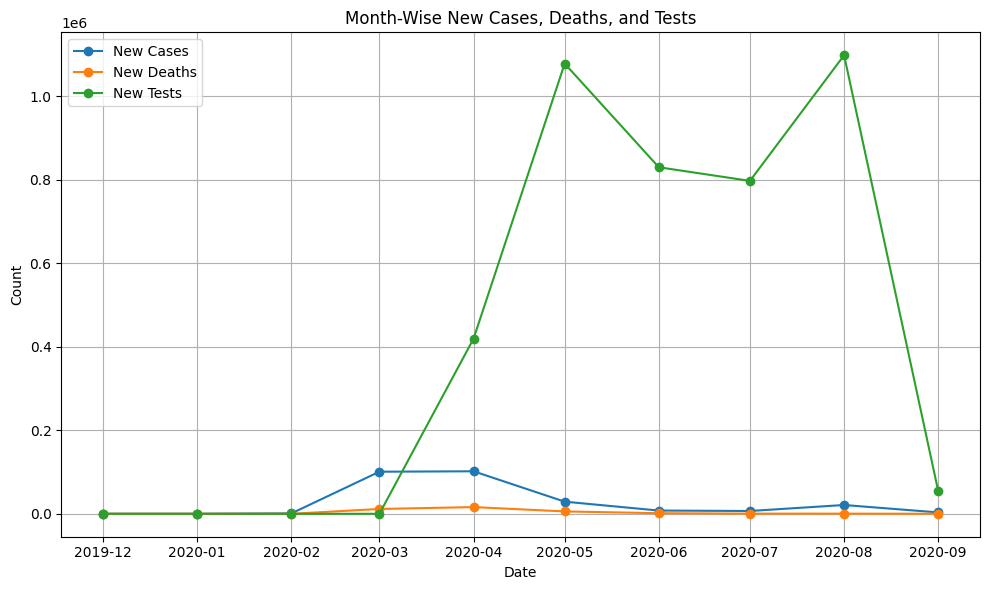

In [161]:
#plot a line graph showing how the number of daily cases varies over time
month_wise_data['Date'] = pd.to_datetime(month_wise_data[['year', 'month']].assign(day=1))

plt.figure(figsize=(10, 6))

plt.plot(month_wise_data['Date'], month_wise_data['new_cases'], label='New Cases', marker='o')
plt.plot(month_wise_data['Date'], month_wise_data['new_deaths'], label='New Deaths', marker='o')
plt.plot(month_wise_data['Date'], month_wise_data['new_tests'], label='New Tests', marker='o')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Month-Wise New Cases, Deaths, and Tests')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

In [162]:
month_wise_data.to_csv('covid_month_wise_data.csv', index=False)